In [1]:
import pandas as pd

In [9]:
df = pd.read_csv("data/Datafiniti_Fast_Food_Restaurants.csv")

In [10]:
columns = ["id", "dateAdded", "dateUpdated", "keys", "sourceURLs", "websites", "address"]

In [11]:
df.drop(columns = columns, inplace = True)

In [12]:
df.head()

,categories,city,country,latitude,longitude,name,postalCode,province
0,American Restaurant and Fast Food Restaurant,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA
1,Fast Food Restaurants,Thibodaux,US,29.814697,-90.814742,SONIC Drive In,70301,LA
2,Fast Food Restaurant,Pigeon Forge,US,35.803788,-83.580553,Taco Bell,37863,TN
3,Fast Food,Pigeon Forge,US,35.782339,-83.551408,Arby's,37863,TN
4,Fast Food Restaurant,Morrow,US,33.562738,-84.321143,Steak 'n Shake,30260,GA


In [13]:
column_names = ["name", "categories", "city", "province", "country", "postalCode", "latitude", "longitude"]

In [16]:
df = df[column_names]

In [17]:
df = df.rename(columns = {"province": "state"})

In [18]:
df.head()

,name,categories,city,state,country,postalCode,latitude,longitude
0,SONIC Drive In,American Restaurant and Fast Food Restaurant,Thibodaux,LA,US,70301,29.814697,-90.814742
1,SONIC Drive In,Fast Food Restaurants,Thibodaux,LA,US,70301,29.814697,-90.814742
2,Taco Bell,Fast Food Restaurant,Pigeon Forge,TN,US,37863,35.803788,-83.580553
3,Arby's,Fast Food,Pigeon Forge,TN,US,37863,35.782339,-83.551408
4,Steak 'n Shake,Fast Food Restaurant,Morrow,GA,US,30260,33.562738,-84.321143


In [19]:
df.to_csv("Cleaned_Fast_Food.csv", index = False)

In [20]:
df.nunique()

name           571
categories     324
city          2764
state           50
country          1
postalCode    5429
latitude      9324
longitude     9329
dtype: int64

In [21]:
df.drop(columns = "country", inplace = True)

In [22]:
df.to_csv("Cleaned_Fast_Food.csv", index = False)

In [23]:
df.head()

,name,categories,city,state,postalCode,latitude,longitude
0,SONIC Drive In,American Restaurant and Fast Food Restaurant,Thibodaux,LA,70301,29.814697,-90.814742
1,SONIC Drive In,Fast Food Restaurants,Thibodaux,LA,70301,29.814697,-90.814742
2,Taco Bell,Fast Food Restaurant,Pigeon Forge,TN,37863,35.803788,-83.580553
3,Arby's,Fast Food,Pigeon Forge,TN,37863,35.782339,-83.551408
4,Steak 'n Shake,Fast Food Restaurant,Morrow,GA,30260,33.562738,-84.321143


In [2]:
df = pd.read_csv("assets/data/Cleaned_Fast_Food.csv")
df.head()

,name,categories,city,state,postalCode,latitude,longitude
0,SONIC Drive In,American Restaurant and Fast Food Restaurant,Thibodaux,LA,70301,29.814697,-90.814742
1,SONIC Drive In,Fast Food Restaurants,Thibodaux,LA,70301,29.814697,-90.814742
2,Taco Bell,Fast Food Restaurant,Pigeon Forge,TN,37863,35.803788,-83.580553
3,Arby's,Fast Food,Pigeon Forge,TN,37863,35.782339,-83.551408
4,Steak 'n Shake,Fast Food Restaurant,Morrow,GA,30260,33.562738,-84.321143


In [3]:
df.nunique()

name           571
categories     324
city          2764
state           50
postalCode    5429
latitude      9324
longitude     9329
dtype: int64

In [4]:
df.groupby("state").count().head()

,name,categories,city,postalCode,latitude,longitude
state,,,,,,
AK,16,16,16,16,16,16
AL,6,6,6,6,6,6
AR,102,102,102,102,102,102
AZ,330,330,330,330,330,330
CA,1201,1201,1201,1201,1201,1201


In [5]:
top_50 = df.groupby("name").size().nlargest(50).reset_index("name")

In [6]:
top_50.head()

,name,0
0,McDonald's,1898
1,Taco Bell,1032
2,Burger King,833
3,Subway,776
4,Arby's,663


In [7]:
top_50.rename(columns = {"name": "Company", 0 : "Count"}, inplace = True)

In [8]:
top_50.head()

,Company,Count
0,McDonald's,1898
1,Taco Bell,1032
2,Burger King,833
3,Subway,776
4,Arby's,663


In [10]:
df2 = pd.read_csv("assets/data/Fast_Food_Sales.csv")

In [11]:
combined = pd.merge(top_50, df2, on = "Company")

In [12]:
# Only a fraction of stores ("Count") is captured in the larger 10,000-row dataset and there's only 
# a 25-restaurant overlap between it and the sales data
combined

,Company,Count,Category,2016 U.S. Systemwide Sales (millions),2016 U.S. Average Sales Per Unit (thousands),Number of Franchised Units in 2016,Number of Company Units in 2016,Total Units in 2016
0,McDonald's,1898,Burger,36389.00,2550.00,13046,1109,14155
1,Taco Bell,1032,Ethnic,9353.80,1510.00,5399,879,6278
2,Burger King,833,Burger,9749.19,1361.43,7111,50,7161
3,Subway,776,Sandwich,11300.00,422.52,26744,0,26744
4,Arby's,663,Sandwich,3600.00,1117.00,2314,1044,3358
5,Wendy's,628,Burger,9510.00,1454.80,6207,330,6537
6,Jack in the Box,330,Burger,3445.00,1530.00,1838,417,2255
7,Pizza Hut,230,Pizza,5751.40,740.00,7371,318,7689
8,Dairy Queen,218,Snack,3621.00,1268.05,4515,2,4517
9,Chick-fil-A,206,Chicken,7973.50,4407.10,1730,372,2102


In [13]:
combined.to_csv("assets/data/Top25.csv")

In [14]:
# It appears that some states are underrepresented; Mississippi only has 55 restaurants in the large dataset
# and Alabama only has 6. 
df.groupby("state").size().nlargest(50)

state
CA    1201
TX     811
FL     621
OH     522
GA     420
IL     405
PA     383
MI     374
NY     352
AZ     330
TN     302
NC     295
IN     254
VA     253
MA     205
LA     202
MN     199
WA     196
WI     189
SC     188
MD     172
OK     166
KY     166
MO     163
OR     154
CO     148
NJ     129
NV     121
IA     115
AR     102
NE      87
NM      78
KS      74
WV      70
UT      63
MS      55
CT      53
ID      51
DE      44
SD      42
MT      38
ND      35
NH      34
HI      32
WY      29
ME      25
AK      16
VT      15
RI      15
AL       6
dtype: int64

In [15]:
# Sorting top five by total sales
combined.sort_values("2016 U.S. Systemwide Sales (millions)", ascending = False).head()

,Company,Count,Category,2016 U.S. Systemwide Sales (millions),2016 U.S. Average Sales Per Unit (thousands),Number of Franchised Units in 2016,Number of Company Units in 2016,Total Units in 2016
0,McDonald's,1898,Burger,36389.00,2550.00,13046,1109,14155
3,Subway,776,Sandwich,11300.00,422.52,26744,0,26744
2,Burger King,833,Burger,9749.19,1361.43,7111,50,7161
5,Wendy's,628,Burger,9510.00,1454.80,6207,330,6537
1,Taco Bell,1032,Ethnic,9353.80,1510.00,5399,879,6278


In [16]:
# Sorting top five by average sales per unit
combined.sort_values("2016 U.S. Average Sales Per Unit (thousands)", ascending = False).head()

,Company,Count,Category,2016 U.S. Systemwide Sales (millions),2016 U.S. Average Sales Per Unit (thousands),Number of Franchised Units in 2016,Number of Company Units in 2016,Total Units in 2016
9,Chick-fil-A,206,Chicken,7973.50,4407.1,1730,372,2102
19,Whataburger,41,Burger,2181.35,2706.0,122,684,806
12,Panera Bread,76,Sandwich,5200.00,2700.0,1134,908,2042
0,McDonald's,1898,Burger,36389.00,2550.0,13046,1109,14155
13,Culver's,71,Burger,1301.38,2252.2,597,8,605


In [17]:
# Sorting top five by number of units (which also shows where data is missing in larger dataset)
combined.sort_values("Total Units in 2016", ascending = False).head()

,Company,Count,Category,2016 U.S. Systemwide Sales (millions),2016 U.S. Average Sales Per Unit (thousands),Number of Franchised Units in 2016,Number of Company Units in 2016,Total Units in 2016
3,Subway,776,Sandwich,11300.00,422.52,26744,0,26744
0,McDonald's,1898,Burger,36389.00,2550.00,13046,1109,14155
14,Dunkin' Donuts,71,Snack,8200.00,928.86,8828,0,8828
7,Pizza Hut,230,Pizza,5751.40,740.00,7371,318,7689
2,Burger King,833,Burger,9749.19,1361.43,7111,50,7161


In [18]:
top_5_units = combined.sort_values("Total Units in 2016", ascending = False).head()

In [19]:
top_5_units

,Company,Count,Category,2016 U.S. Systemwide Sales (millions),2016 U.S. Average Sales Per Unit (thousands),Number of Franchised Units in 2016,Number of Company Units in 2016,Total Units in 2016
3,Subway,776,Sandwich,11300.00,422.52,26744,0,26744
0,McDonald's,1898,Burger,36389.00,2550.00,13046,1109,14155
14,Dunkin' Donuts,71,Snack,8200.00,928.86,8828,0,8828
7,Pizza Hut,230,Pizza,5751.40,740.00,7371,318,7689
2,Burger King,833,Burger,9749.19,1361.43,7111,50,7161


In [125]:
df2.head()

,Company,Category,2016 U.S. Systemwide Sales (millions),2016 U.S. Average Sales Per Unit (thousands),Number of Franchised Units in 2016,Number of Company Units in 2016,Total Units in 2016
0,McDonald's,Burger,36389.00,2550.00,13046,1109,14155
1,Starbucks,Snack,14795.40,1123.25,5292,7880,13172
2,Subway,Sandwich,11300.00,422.52,26744,0,26744
3,Wendy's,Burger,9510.00,1454.80,6207,330,6537
4,Burger King,Burger,9749.19,1361.43,7111,50,7161


In [20]:
# Nearly 160,000 total fast food restaurants in the top 50
df2["Total Units in 2016"].sum()

159792

In [21]:
sales_of_top50 = df2["2016 U.S. Systemwide Sales (millions)"].sum()*1000
sales_of_top50

189363670.0

In [22]:
population_of_USA = 329968629

In [23]:
per_capita_sales = population_of_USA/sales_of_top50

In [24]:
per_capita_sales

1.7425128537063101

In [50]:
# Scraped state populations (WorldAtlas.com)
state_pop = pd.read_csv("assets/data/state_populations.csv")
state_pop.head()

,Rank,﻿State,Population
0,1,California,39557045
1,2,Texas,28701845
2,3,Florida,21299325
3,4,New York,19542209
4,5,Pennsylvania,12807060


In [52]:
state_pop["Abbreviation"] = ['CA', 'TX', 'FL', 'NY', 'PA', 'IL', 'OH', 'GA', 'NC', 'MI', 
                             'NJ', 'VA', 'WA', 'AZ', 'MA', 'TN', 'IN', 'MO', 'MD', 'WI', 'CO', 
                             'MN', 'SC', 'AL', 'LA', 'KY', 'OR', 'OK', 'CT', 'UT', 'IA', 'NV', 
                             'AR', 'MS', 'KS', 'NM', 'NE', 'WV', 'ID', 'HI', 'NH', 'ME', 'MT', 
                             'RI', 'DE', 'SD', 'ND', 'AK', 'VT', 'WY']

In [57]:
state_pop.head(3)

,Rank,﻿State,Population,Abbreviation
0,1,California,39557045,CA
1,2,Texas,28701845,TX
2,3,Florida,21299325,FL


In [25]:
# Most popular types of food from sales dataset
df2.groupby("Category").size().nlargest(10)

Category
Burger      13
Chicken      9
Sandwich     8
Ethnic       7
Snack        7
Pizza        5
Seafood      1
dtype: int64

(-1.1138856119308733,
 1.100661219615756,
 -1.107962920036388,
 1.1072980263210073)

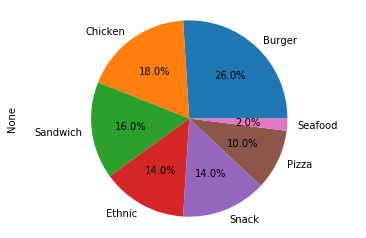

In [27]:
# pie chart for most popular food categories from sales dataset
df2.groupby("Category").size().nlargest(10).plot(kind = "pie", autopct="%1.1f%%").axis("equal")

In [28]:
# Breakdown by type of food for top 30 restaurant categories in 10,000 row dataset
df.groupby("categories").size().nlargest(30)

categories
Fast Food Restaurant                                             3425
Fast Food Restaurants                                            3406
Fast Food                                                        1777
Fast Food Restaurant and Burger Joint                             260
Fast food restaurants                                             191
Fast Food Restaurant and Mexican Restaurant                       132
Fast Food Restaurant, American Restaurant, and Sandwich Place     101
Fast Food Restaurant, Sandwich Place, and American Restaurant      65
Sandwich Place and Fast Food Restaurant                            35
Fast Food Restaurant and American Restaurant                       29
American Restaurant and Fast Food Restaurant                       22
Ice Cream Shop and Fast Food Restaurant                            19
Burger Joint, Fast Food Restaurant, and American Restaurant        16
Mexican Restaurant and Fast Food Restaurant                        16
Fast Food

In [3]:
df = pd.read_csv("Cleaned_Fast_Food.csv")

In [29]:
df.groupby("state").size().nsmallest(10)

state
AL     6
RI    15
VT    15
AK    16
ME    25
WY    29
HI    32
NH    34
ND    35
MT    38
dtype: int64

In [30]:
df.groupby("state").size().nlargest(10)

state
CA    1201
TX     811
FL     621
OH     522
GA     420
IL     405
PA     383
MI     374
NY     352
AZ     330
dtype: int64

In [31]:
# Mean number of restaurants per state is 200
df.groupby("state").size().mean()

200.0

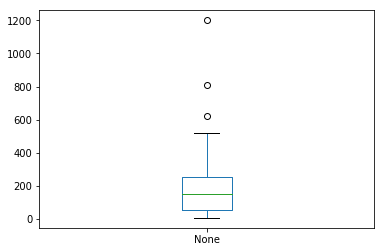

In [32]:
# Top three (CA, TX, FL) are outliers
df.groupby("state").size().plot(kind = "box")

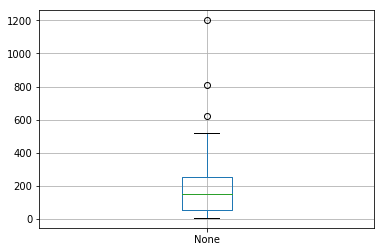

In [33]:
df.groupby("state").size().plot(kind = "box", grid = True)

In [34]:
# Median number of restaurants per state is 151 -- outliers skew the mean upward to 200
df.groupby("state").size().median()

151.0

In [35]:
# Not sure if mode tells us anything -- doesn't look like it
df.groupby("state").size().mode()

0     15
1    166
dtype: int64

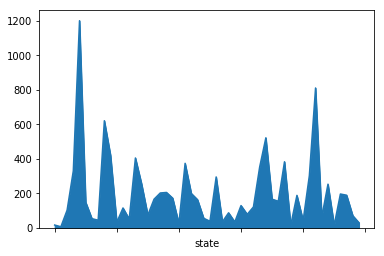

In [36]:
df.groupby("state").size().plot(kind = "area")

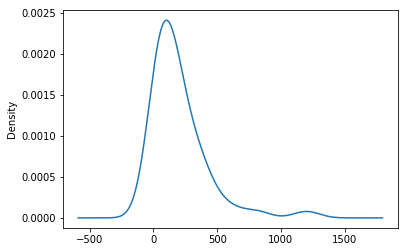

In [37]:
df.groupby("state").size().plot(kind = "kde")

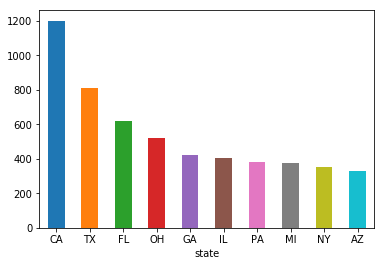

In [38]:
df.groupby("state").size().nlargest(10).plot(kind = "bar", rot = 0)

In [40]:
demo_df = pd.read_csv("assets/data/demographic_data.csv")

In [73]:
demo_df.rename(columns = {"State Abbr":"state abbr"}, inplace = True)
demo_df.head()

,state abbr,number of restaurants,poverty,povertyMoe,age,ageMoe,income,incomeMoe,healthcare,healthcareLow,healthcareHigh,obesity,obesityLow,obesityHigh,smokes,smokesLow,smokesHigh
0,CA,1201,16.4,0.2,36.0,0.1,61933,238,14.8,13.8,15.8,24.7,23.5,25.9,12.9,11.9,13.8
1,TX,811,17.2,0.2,34.3,0.1,53035,377,24.9,23.7,26.1,31.9,30.6,33.3,14.5,13.6,15.5
2,FL,621,16.5,0.3,41.6,0.1,47463,329,17.6,16.4,18.8,26.2,25.0,27.5,17.7,16.5,18.8
3,OH,522,15.8,0.3,39.4,0.1,49308,363,10.2,9.2,11.3,32.6,31.2,34.1,21.0,19.7,22.3
4,GA,420,18.3,0.4,36.1,0.1,49321,543,20.9,19.3,22.5,30.5,28.9,32.1,17.4,15.9,18.8


In [74]:
state_pop.rename(columns = {"Abbreviation": "state abbr"}, inplace = True)
state_pop.head()

,Rank,﻿State,Population,state abbr
0,1,California,39557045,CA
1,2,Texas,28701845,TX
2,3,Florida,21299325,FL
3,4,New York,19542209,NY
4,5,Pennsylvania,12807060,PA


In [79]:
# demo = pd.merge(demo_df, state_pop, on = "state abbr")
demo.rename(columns = {"State": "state"}, inplace = True)
demo.to_csv("assets/data/State_Pop_Demographics_Restaurants.csv", index = False)

In [60]:
top_50.head()

,Company,Count
0,McDonald's,1898
1,Taco Bell,1032
2,Burger King,833
3,Subway,776
4,Arby's,663


In [64]:
demo_df.groupby(["state", "name"])["state"].size().nlargest(50).sort_values(ascending = False)\
                .head(10).plot(kind = "bar", rot = 45)

KeyError: 'state'

In [44]:
obesity = demo_df.sort_values(by = "obesity", ascending = False).reset_index()

In [45]:
obesity.head()

,index,state_long,number of restaurants,poverty,povertyMoe,age,ageMoe,income,incomeMoe,healthcare,healthcareLow,healthcareHigh,obesity,obesityLow,obesityHigh,smokes,smokesLow,smokesHigh
0,29,AR,102,18.9,0.5,37.8,0.2,41262,653,16.3,14.4,18.2,35.9,33.8,38.0,24.7,22.7,26.7
1,33,WV,70,18.3,0.7,41.9,0.2,41059,651,10.1,9.1,11.2,35.7,34.2,37.2,26.7,25.2,28.1
2,35,MS,55,21.5,0.6,36.7,0.2,39680,773,18.8,17.0,20.7,35.5,33.4,37.6,23.0,21.0,24.9
3,15,LA,202,19.8,0.5,36.1,0.1,44555,738,18.7,17.4,20.0,34.9,33.4,36.4,24.0,22.6,25.4
4,49,AL,6,19.3,0.5,38.6,0.2,42830,598,13.9,12.7,15.1,33.5,32.1,35.0,21.1,19.8,22.5


In [46]:
obesity.describe()

,index,number of restaurants,poverty,povertyMoe,age,ageMoe,income,incomeMoe,healthcare,healthcareLow,healthcareHigh,obesity,obesityLow,obesityHigh,smokes,smokesLow,smokesHigh
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,200.000000,14.810000,0.518000,38.056000,0.174000,54109.720000,783.400000,12.714000,11.530000,13.904000,29.376000,27.912000,30.856000,18.502000,17.188000,19.822000
std,14.57738,222.035665,3.090291,0.208679,2.397461,0.077749,8985.187736,443.053275,3.938974,3.793294,4.118349,3.276232,3.169346,3.411874,3.469899,3.306681,3.658554
min,0.00000,6.000000,9.200000,0.200000,30.500000,0.100000,39680.000000,238.000000,4.600000,4.000000,5.200000,21.300000,20.400000,22.200000,9.700000,9.000000,10.300000
25%,12.25000,51.500000,12.050000,0.400000,36.600000,0.100000,47612.000000,474.000000,10.025000,8.875000,11.125000,27.325000,25.725000,28.525000,16.300000,14.850000,17.450000
50%,24.50000,151.000000,14.600000,0.500000,38.150000,0.200000,52563.000000,652.000000,12.650000,11.550000,13.500000,29.650000,27.850000,31.150000,18.300000,17.050000,19.350000
75%,36.75000,253.750000,17.050000,0.700000,39.400000,0.200000,60620.500000,934.500000,14.950000,13.775000,16.425000,31.275000,30.050000,33.025000,20.425000,19.100000,22.025000
max,49.00000,1201.000000,21.500000,0.900000,44.100000,0.400000,73971.000000,1983.000000,24.900000,23.700000,26.100000,35.900000,34.200000,38.000000,26.700000,25.200000,28.100000


In [58]:
# obesity.drop(columns = ["id", "-0.385218228"], inplace = True)

In [48]:
obesity.head()

,index,state_long,number of restaurants,poverty,povertyMoe,age,ageMoe,income,incomeMoe,healthcare,healthcareLow,healthcareHigh,obesity,obesityLow,obesityHigh,smokes,smokesLow,smokesHigh
0,29,AR,102,18.9,0.5,37.8,0.2,41262,653,16.3,14.4,18.2,35.9,33.8,38.0,24.7,22.7,26.7
1,33,WV,70,18.3,0.7,41.9,0.2,41059,651,10.1,9.1,11.2,35.7,34.2,37.2,26.7,25.2,28.1
2,35,MS,55,21.5,0.6,36.7,0.2,39680,773,18.8,17.0,20.7,35.5,33.4,37.6,23.0,21.0,24.9
3,15,LA,202,19.8,0.5,36.1,0.1,44555,738,18.7,17.4,20.0,34.9,33.4,36.4,24.0,22.6,25.4
4,49,AL,6,19.3,0.5,38.6,0.2,42830,598,13.9,12.7,15.1,33.5,32.1,35.0,21.1,19.8,22.5


In [59]:
# means_by_state = demo_combined.groupby("state").mean()

In [83]:
means_by_state.sort_values(by = "poverty", ascending = False).head()

,id,poverty,povertyMoe,age,ageMoe,income,incomeMoe,healthcare,healthcareLow,healthcareHigh,obesity,obesityLow,obesityHigh,smokes,smokesLow,smokesHigh,-0.385218228,latitude,longitude
state,,,,,,,,,,,,,,,,,,,
MS,28,21.5,0.6,36.7,0.2,39680,773,18.8,17.0,20.7,35.5,33.4,37.6,23.0,21.0,24.9,NaN,32.892372,-89.649682
NM,35,21.3,0.9,37.2,0.2,44803,849,15.4,14.1,16.8,28.4,26.9,30.0,19.2,17.7,20.6,NaN,34.631333,-106.361484
LA,22,19.8,0.5,36.1,0.1,44555,738,18.7,17.4,20.0,34.9,33.4,36.4,24.0,22.6,25.4,NaN,30.659084,-91.517311
AL,1,19.3,0.5,38.6,0.2,42830,598,13.9,12.7,15.1,33.5,32.1,35.0,21.1,19.8,22.5,NaN,32.898891,-86.667125
KY,21,19.1,0.5,38.5,0.2,42958,697,10.0,8.8,11.1,31.6,30.2,33.1,26.2,24.7,27.7,NaN,37.770018,-85.390993


In [66]:
demo_combined.describe()

,id,poverty,povertyMoe,age,ageMoe,income,incomeMoe,healthcare,healthcareLow,healthcareHigh,obesity,obesityLow,obesityHigh,smokes,smokesLow,smokesHigh,-0.385218228,latitude,longitude
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,0.0,10000.000000,10000.000000
mean,27.699000,15.668710,0.362400,37.773220,0.128780,53934.509800,503.271400,14.206860,13.064440,15.363110,29.159600,27.787880,30.557450,17.755620,16.547990,18.967490,NaN,37.337400,-93.106515
std,16.013464,2.412624,0.146616,2.062721,0.051303,7562.951548,251.900979,4.629799,4.522709,4.748398,3.098051,2.996398,3.221284,3.535838,3.379702,3.723275,NaN,5.100276,15.787614
min,1.000000,9.200000,0.200000,30.500000,0.100000,39680.000000,238.000000,4.600000,4.000000,5.200000,21.300000,20.400000,22.200000,9.700000,9.000000,10.300000,NaN,19.504168,-159.378066
25%,12.000000,14.200000,0.300000,36.100000,0.100000,48363.000000,377.000000,10.300000,9.300000,11.300000,26.900000,25.400000,28.100000,14.600000,13.600000,15.700000,NaN,33.773973,-102.891796
50%,26.000000,16.400000,0.300000,37.700000,0.100000,52622.000000,433.000000,14.200000,12.900000,15.600000,29.700000,28.400000,31.100000,17.400000,15.900000,18.800000,NaN,37.706263,-87.951149
75%,42.000000,17.200000,0.400000,39.400000,0.200000,61303.000000,561.000000,16.300000,15.100000,18.200000,31.600000,30.200000,33.100000,20.600000,19.200000,22.100000,NaN,41.140722,-81.454907
max,56.000000,21.500000,0.900000,44.100000,0.400000,73971.000000,1983.000000,24.900000,23.700000,26.100000,35.900000,34.200000,38.000000,26.700000,25.200000,28.100000,NaN,64.840240,-67.463019


In [100]:
# Correlation between obesity and poverty overall
obesity["obesity"].corr(obesity["poverty"])

0.4623462429179055

In [105]:
# Dropping Washington, DC
obesity.drop(49, inplace = True)

In [108]:
obesity["obesity"].corr(top_50["Count"])

0.7043404886049724

In [114]:
state_count = df.groupby("state").size().nlargest(50).reset_index("state")

In [115]:
state_count.head()

,state,0
0,CA,1201
1,TX,811
2,FL,621
3,OH,522
4,GA,420


In [60]:
# state_count.to_json("state_count.json", index = False)

In [117]:
state_count.rename(columns = {0 : "number of restaurants"}, inplace = True)

In [118]:
state_count.to_csv("data/Count_by_State.csv", index = False)

In [62]:
demo_count = pd.merge(state_count, obesity, on = "state")

NameError: name 'state_count' is not defined

In [61]:
demo_count.head()

NameError: name 'demo_count' is not defined

In [121]:
demo_count.drop(columns = ["index", "state_long"], inplace = True)

In [123]:
demo_count.to_csv("demographic_data.csv", index = False)

In [124]:
demo_count["number of restaurants"].corr(demo_count["obesity"])

-0.06071049176445141

In [125]:
demo_count["number of restaurants"].corr(demo_count["income"])

-0.01792311160696316

In [126]:
demo_count["number of restaurants"].corr(demo_count["age"])

-0.10841222919585207

In [127]:
demo_count["number of restaurants"].corr(demo_count["poverty"])

0.25540437617444856

In [128]:
demo_count["number of restaurants"].corr(demo_count["smokes"])

-0.1977080362495971

In [129]:
# Sounds mildly plausible -- negative correlation between low obesity and high restaurant count
demo_count["number of restaurants"].corr(demo_count["obesityLow"])

-0.03599592665197667

In [130]:
demo_count["number of restaurants"].corr(demo_count["obesityHigh"])

-0.08042763870868921

In [133]:
demo_count["number of restaurants"].corr(demo_count["healthcareHigh"])

0.3256462240939498

In [134]:
# This is a low (weak) linear relationship
demo_count["number of restaurants"].corr(demo_count["healthcareLow"])

0.37180442351488147

In [135]:
from scipy.stats import ttest_ind_from_stats

In [136]:
n1 = 50
mean1 = demo_count["number of restaurants"].mean()
n2 = 50
mean2 = demo_count["poverty"].mean()

In [138]:
sd1 = demo_count["number of restaurants"].std()

In [139]:
sd2 = demo_count["poverty"].std()

In [141]:
tstat, pvalue = ttest_ind_from_stats(mean1, sd1, n1, mean2, sd2, n2)

In [142]:
# p-value for a two-sided t-test of correlation between number of restaurants
# and poverty level is 0.0000000527 -- extraordinarily low. This makes it statistically significant.
pvalue

5.2713361236173005e-08

In [149]:
subset = demo_count.sort_values(by = "obesity", ascending = False).head(10)

In [150]:
# Correlation between ten most obese states and number of restaurants in 10,000 row dataset
subset["number of restaurants"].corr(subset["obesity"])

-0.3717691573433956

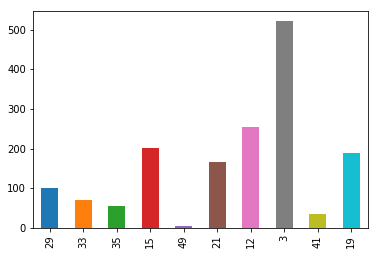

In [156]:
subset["number of restaurants"].plot(kind = "bar")

In [157]:
subset_of_5 = subset.head(5)

In [158]:
# Looking at five most-obese states, there's a weak positive correlation
subset_of_5["number of restaurants"].corr(subset_of_5["obesity"])

0.3376211407166021

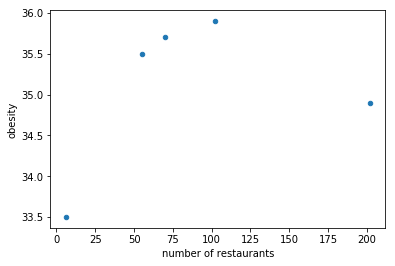

In [160]:
subset_of_5.plot(kind = "scatter", x = "number of restaurants", y = "obesity")